# Regression

## Data loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('option_train.csv')
df_train = df_train.iloc[:, 1:]
df_train.head()

,Value,S,K,tau,r,BS
0,348.500,1394.46,1050,0.128767,0.0116,Under
1,149.375,1432.25,1400,0.679452,0.0113,Under
2,294.500,1478.90,1225,0.443836,0.0112,Under
3,3.375,1369.89,1500,0.117808,0.0119,Over
4,84.000,1366.42,1350,0.298630,0.0119,Under


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   5000 non-null   float64
 1   S       5000 non-null   float64
 2   K       5000 non-null   int64  
 3   tau     5000 non-null   float64
 4   r       5000 non-null   float64
 5   BS      5000 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 234.5+ KB


In [3]:
df_test = pd.read_csv('option_test_nolabel.csv')
df_test = df_test.iloc[:, 1:]
df_test.head()

,S,K,tau,r
0,1409.28,1325,0.126027,0.0115
1,1505.97,1100,0.315068,0.0110
2,1409.57,1450,0.197260,0.0116
3,1407.81,1250,0.101370,0.0116
4,1494.50,1300,0.194521,0.0110


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   S       500 non-null    float64
 1   K       500 non-null    int64  
 2   tau     500 non-null    float64
 3   r       500 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 15.8 KB


## Exploratory Data Analysis

### Column S

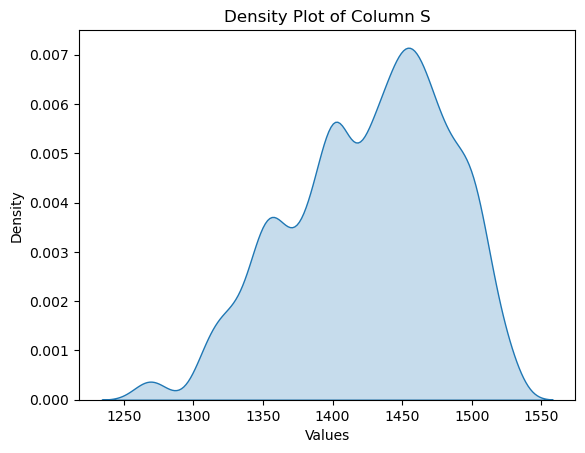

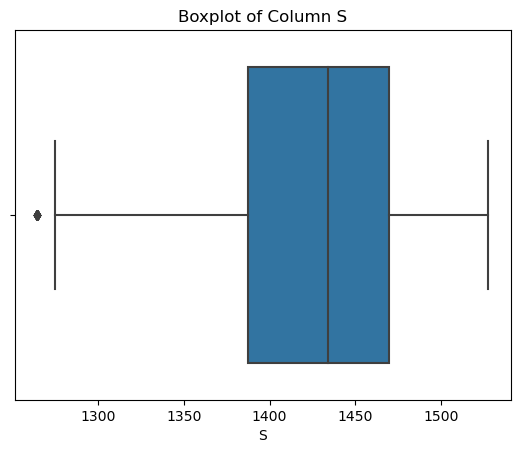

In [11]:
import seaborn as sns

# Density Plot
sns.kdeplot(df_train['S'], fill=True)
plt.title('Density Plot of Column S')
plt.xlabel('Values')
plt.show()

# Boxplot to view outliers and overall spread
sns.boxplot(x=df_train['S'])
plt.title('Boxplot of Column S')
plt.show()

### Column K

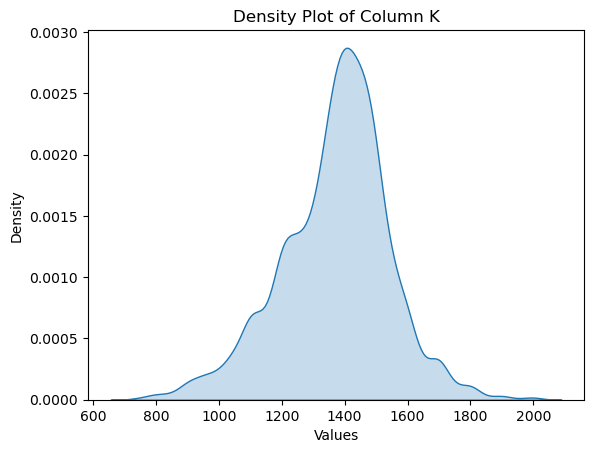

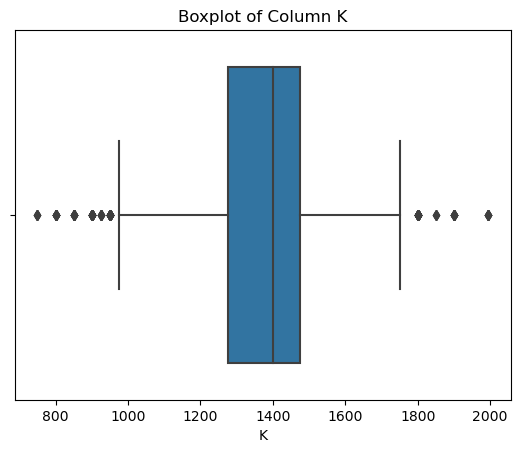

In [12]:
import seaborn as sns

# Density Plot
sns.kdeplot(df_train['K'], fill=True)
plt.title('Density Plot of Column K')
plt.xlabel('Values')
plt.show()

# Boxplot to view outliers and overall spread
sns.boxplot(x=df_train['K'])
plt.title('Boxplot of Column K')
plt.show()

### Column tau

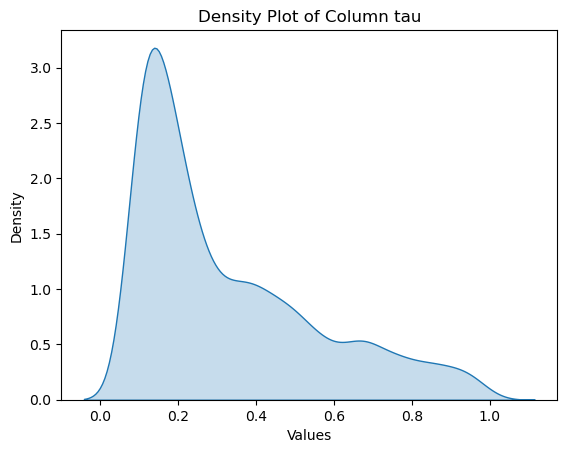

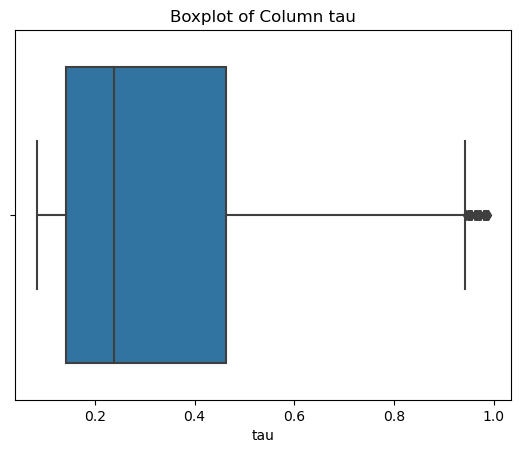

In [13]:
import seaborn as sns

# Density Plot
sns.kdeplot(df_train['tau'], fill=True)
plt.title('Density Plot of Column tau')
plt.xlabel('Values')
plt.show()

# Boxplot to view outliers and overall spread
sns.boxplot(x=df_train['tau'])
plt.title('Boxplot of Column tau')
plt.show()

### Column r

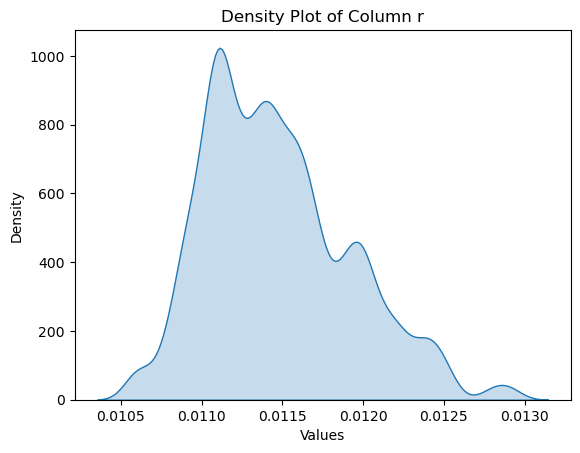

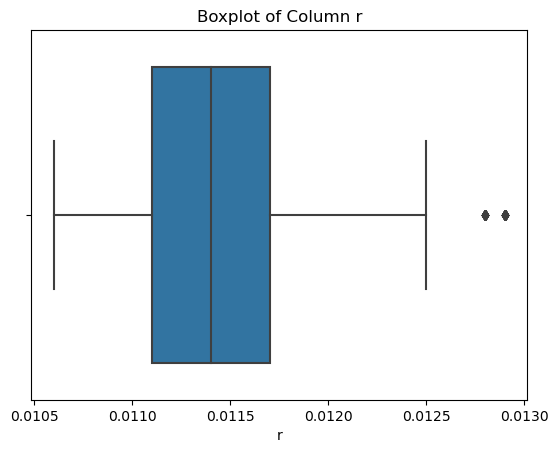

In [14]:
import seaborn as sns

# Density Plot
sns.kdeplot(df_train['r'], fill=True)
plt.title('Density Plot of Column r')
plt.xlabel('Values')
plt.show()

# Boxplot to view outliers and overall spread
sns.boxplot(x=df_train['r'])
plt.title('Boxplot of Column r')
plt.show()

### Correlation

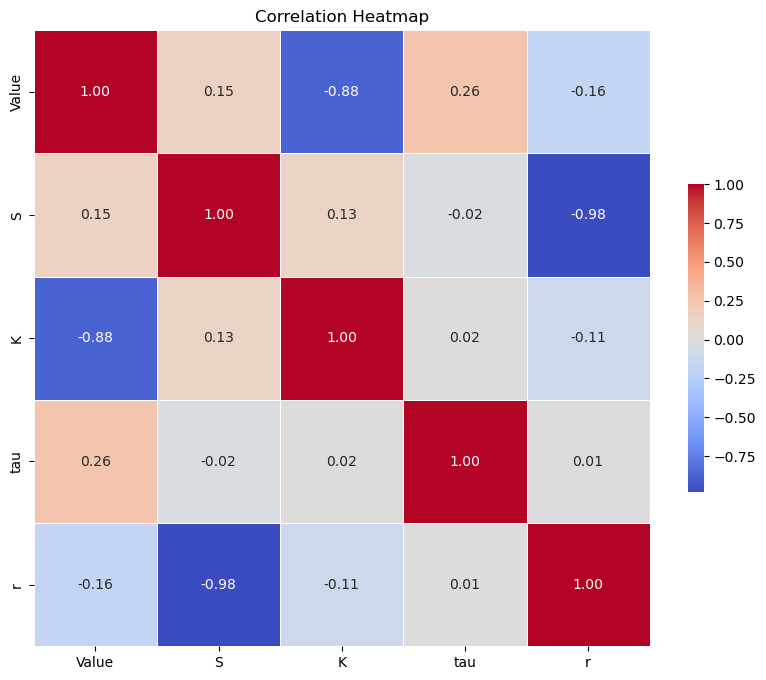

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Assuming your data is in a pandas DataFrame

# Assuming 'data' is your DataFrame
correlation_matrix = df_train.drop(columns=['BS']).corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Adding title
plt.title('Correlation Heatmap')

# Show plot
plt.show()

## Data Preprocessing

### Data Standardization

In [15]:
df_train.columns

Index(['Value', 'S', 'K', 'tau', 'r', 'BS'], dtype='object')

In [4]:
X = df_train.drop(columns=['Value', 'BS'])
X

,S,K,tau,r
0,1394.46,1050,0.128767,0.0116
1,1432.25,1400,0.679452,0.0113
2,1478.90,1225,0.443836,0.0112
3,1369.89,1500,0.117808,0.0119
4,1366.42,1350,0.298630,0.0119
...,...,...,...,...
4995,1465.15,1175,0.424658,0.0111
4996,1480.87,1480,0.101370,0.0111
4997,1356.56,1500,0.673973,0.0120
4998,1333.36,1200,0.309589,0.0122


In [5]:
y = df_train['Value']
y

0       348.500
1       149.375
2       294.500
3         3.375
4        84.000
         ...   
4995    325.250
4996     36.000
4997     90.000
4998    175.875
4999    106.375
Name: Value, Length: 5000, dtype: float64

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=True, 
                        with_std=True,
                        copy=True)

scaler.fit(X)

X_std = scaler.transform(X)

In [7]:
feature_std = pd.DataFrame(X_std, columns=X.columns);

feature_std.std()

S      1.0001
K      1.0001
tau    1.0001
r      1.0001
dtype: float64

### Modeling

In [8]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

model_list = [LinearRegression(), 
              RandomForestRegressor(n_estimators=100, random_state=42), 
              SVR(kernel='rbf'),
              KNeighborsRegressor(n_neighbors=5)
             ]

for model in model_list:
    
    # Initialize the linear regression model
    model = model

    # Setup cross-validation (using 5 folds here)
    kf = KFold(n_splits=10, shuffle=True, random_state=42)

    # Perform cross-validation using R-squared as the metric
    r_squared_scores = cross_val_score(model, X, y, cv=kf, scoring='r2', verbose=2)

    # Display the R-squared scores for each fold and the mean R-squared
    print(f"Model: {model}")
    print(f"Mean R-squared: {np.mean(r_squared_scores)}\n")


[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
Model: LinearRegression()
Mean R-squared: 0.9244138358730758

[CV] END .................................................... total time=   0.6s
[CV] END ......................................

In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {
    LinearRegression: {},
    RandomForestRegressor: {'n_estimators': [50, 100, 200], 'max_features': ['auto', 'sqrt', 'log2']},
    SVR: {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'], 'kernel': ['rbf', 'linear']},
    KNeighborsRegressor: {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
}

for model in model_list:
    # Get the model name for display and fetching the right parameters
    model_name = model.__class__.__name__
    
    # Setup GridSearchCV
    grid_search = GridSearchCV(model, 
                               param_grid[model.__class__], 
                               cv=KFold(n_splits=10, shuffle=True, random_state=42), scoring='r2', verbose=2)
    
    # Perform grid search
    grid_search.fit(X, y)
    
    # Display the best parameters and the mean R-squared of the best estimator
    print(f"Model: {model_name}")
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best mean R-squared: {grid_search.best_score_}\n")


Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
Model: LinearRegression
Best parameters: {}
Best mean R-squared: 0.9244138358730758

Fitting 10 folds for each of 9 candidates, t

/Users/murtadha.ramadhan/anaconda3/envs/py3k/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/murtadha.ramadhan/anaconda3/envs/py3k/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/murtadha.ramadhan/anaconda3/envs/py3k/lib/python3.11/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Users/murtadha.ramadhan/anaconda3/envs/py3k/lib/python3.11/site-packages/sklearn/bas

Model: RandomForestRegressor
Best parameters: {'max_features': 'sqrt', 'n_estimators': 200}
Best mean R-squared: 0.9965023609678637

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.4s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.4s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.4s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.4s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.4s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.4s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.4s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.4s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.4s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  

## Predicting New Data

In [ ]:
df_test.head()

In [52]:
X_test = scaler.transform(df_test)
X_test_std = pd.DataFrame(X_test, columns=df_test.columns)

In [53]:
X_test_std

,S,K,tau,r
0,-0.309816,-0.262038,-0.872064,0.072267
1,1.415377,-1.565163,-0.054275,-1.042965
2,-0.304642,0.461920,-0.563912,0.295313
3,-0.336044,-0.696413,-0.978732,0.295313
4,1.210723,-0.406830,-0.575764,-1.042965
...,...,...,...,...
495,1.560258,-0.985997,-0.113535,-1.266011
496,-1.204261,0.751504,-0.291315,0.964453
497,-0.530171,0.230254,-0.741692,0.518360
498,0.176036,0.606712,0.585733,-0.150779


In [54]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)
y_new_predictions = model.predict(X_test_std)

In [55]:
y_new_predictions

array([551.825  , 566.81   , 551.825  , 551.825  , 566.81   , 566.81   ,
       566.81   , 566.81   , 551.825  , 567.61375, 597.88   , 566.81   ,
       551.825  , 566.81   , 597.98   , 606.0425 , 566.81   , 551.825  ,
       551.825  , 551.825  , 566.81   , 551.825  , 566.81   , 567.265  ,
       566.81   , 566.81   , 606.0425 , 566.81   , 566.81   , 566.81   ,
       597.88   , 606.0425 , 566.81   , 551.825  , 606.0425 , 597.88   ,
       551.825  , 551.825  , 551.825  , 566.81   , 566.285  , 551.825  ,
       604.015  , 566.55375, 597.88   , 551.825  , 566.81   , 551.825  ,
       566.81   , 551.825  , 606.0425 , 551.825  , 566.81   , 606.0425 ,
       606.0425 , 566.81   , 551.825  , 551.825  , 597.20625, 566.81   ,
       552.9725 , 551.825  , 551.825  , 566.81   , 566.81   , 566.81   ,
       552.58125, 566.7025 , 551.825  , 551.825  , 551.825  , 551.825  ,
       566.81   , 566.81   , 566.81   , 551.825  , 551.825  , 566.81   ,
       551.825  , 551.825  , 551.825  , 565.85875, 

# Classification Modeling using CV

## Modeling

In [62]:
y_class = df_train['BS']
y_class

0       Under
1       Under
2       Under
3        Over
4       Under
        ...  
4995    Under
4996     Over
4997    Under
4998    Under
4999    Under
Name: BS, Length: 5000, dtype: object

In [64]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
# from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

model_list = [LogisticRegression(max_iter=200, multi_class='multinomial'),
              RandomForestClassifier(n_estimators=100, random_state=42), 
              SVC(kernel='rbf'),
              KNeighborsClassifier(n_neighbors=5)
             ]

for model in model_list:
    
    # Initialize the linear regression model
    model = model

    # Setup cross-validation (using 10 folds here)
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    # Perform cross-validation using accuracy as the metric
    accuracy = cross_val_score(model, X, y_class, cv=kf, scoring='accuracy')

    # Display the accuracy scores
    print(f"Model: {model}")
    print(f"Mean Classification Error: {np.mean(1-accuracy)}\n")


Model: LogisticRegression(max_iter=200, multi_class='multinomial')
Mean Classification Error: 0.1226

Model: RandomForestClassifier(random_state=42)
Mean Classification Error: 0.0636

Model: SVC()
Mean Classification Error: 0.158

Model: KNeighborsClassifier()
Mean Classification Error: 0.1476

